In [5]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
# This fetches the MNIST dataset, which is a set of 70000 small images of hand-written digits 
# In case MNIST site is down, download the MNIST.mat file and put it in scikit-learn-data folder
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

E:\Business\Program_Installations\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
E:\Business\Program_Installations\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [7]:
X, y = mnist["data"], mnist["target"]
X.shape , y.shape

((70000, 784), (70000,))

Saving figure some_digit_plot


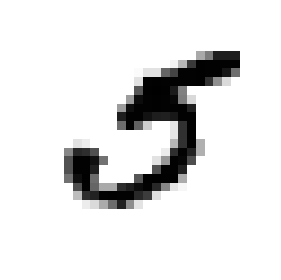

In [8]:
# The 784 above referes to the number of pixels present in each image.
# Each image in the dataset is a 28x28 image, giving it 784 pixels.
# Each value in the feature columns for each row is the intensity of that pixel in the image
# Pixel intensity values vary from 0 (white) to 255 (black).
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# This variable is used later in the Stochastic Gradient Descent classifier 
some_digit = X[36000]

some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [9]:
y[36000]

5.0

In [10]:
# The dataset is already split into training and test sets
# First 60000 rows of training data and remaining test data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# This shuffles the training set 
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
# This creates target vectors for the digit 5
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [13]:
# Use the Stochastic Gradient Descent classifier. 
# This classifier works in the following way:
# For each instance, it computes a decision score based on a decision function
# If the above score is higher than a threshold, the instance is assgined to a positive class
# Otherwise, it enters the instance in the negative class
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
# Accuracy is generally not a good classifier score for classification problems.
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [16]:
# cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, 
# it returns the predictions made on each test fold
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
# The above allows the use of the confusion matrix, since we have a clean prediction for each instance in the training set
# Confusion Matrix : 
# First row = negative class (not 5s), 
# First column = correct non 5 = true negative (TN), Second column = false positive (FP) (wrongly classed as 5)
# Second row = positive class (5s), 
# First column = wrongly classified as not 5 = false negative (FN), Second column = true positive (TP)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

In [18]:
# Demonstrating that a perfect classifier has non-zero values only on the main diagonal
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [19]:
# Precision = TP/(TP+FP)
# Recall = TP/(TP+FN)
# When the detector claims an image is a 5, it is only correct 76% of the time
# The detector is only able to detect 79% of the 5s present in the training set
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred)

0.7687135020350381


0.801328168234643

In [20]:
# Precision and Recall is often combined to create the F-score
# F-score is the harmonic mean of the precision and recall scores
# Harmonic mean given more weight to lower values.
# So classifier only gets a high F-score only if both precision and recall values are high.
# F-scores favour classifiers who have both high precision and high recall.
# increasing precision reduces recall, and vice versa
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

In [21]:
# If the value of the decision threshold mentioned earlier changes,
# it can change the precision and recall values
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [22]:
# The SGD classifier by default uses a threshold value of zero
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [23]:
y_some_digit_pred

array([ True])

In [24]:
# Here we change the threshold value for the classifier and recalculate the predictions
# So, changing the threshold can affect precision and recall values.
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
# Deciding which value of threshold to use.
# For this we need the scores of all instances of the training set
# This is obtained using the cross_val_predict() function, but specifying that we need decision scores instead of predictions.
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
print(y_scores.shape)

# Using these scores, compute precision and recall for all possible threshold values.
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

(60000,)


Saving figure precision_recall_vs_threshold_plot


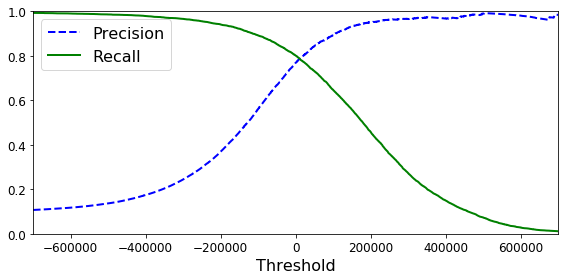

In [26]:
# Plot precision and recall as functions of the threshold values.
# precisions[:-1] returns all values from the precisions list except the last value.
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [27]:
y_train_pred_90 = (y_scores > 70000)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.8659205116491548
0.6993174691016417


Saving figure precision_vs_recall_plot


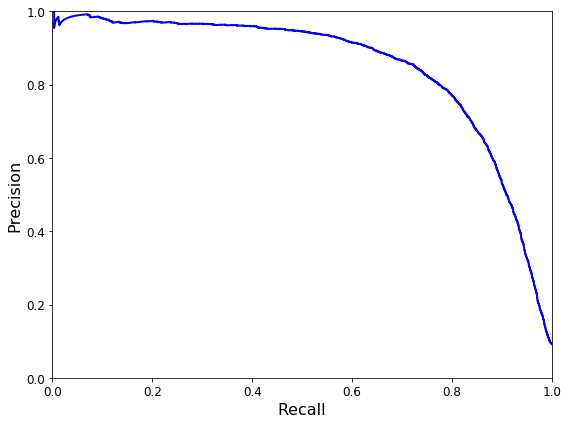

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

In [29]:
# ROC (Receiver Operating Characteristic) curve -  It is very similar to the precision-recall curve
# Difference is that it plots the True Positive Rate (recall) against false positive rate
# False Positive Rate : ratio of negative instances that are incorrectly classified as positive.
# To Plot ROC Curve, calculate  first the TPR and FPR for various threshold values\
# This is done using roc_curve() function
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


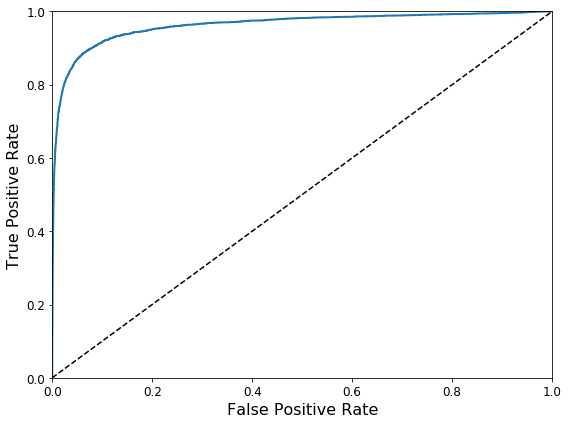

In [30]:
# Plotting TPR against FPR shows that greater the TPR (recall) value, higher is the FPR
# Dotted line on the curve represents a purely random classifier.
# Curves for good classifiers need to be as far away towqards the top left of the curve from the dotted line.
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

In [31]:
# roc_auc_score calculates the area under the curve for the ROC curve.
# A good classifier will have this value close to 1.
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967156

In [39]:
# Random Forest Classifier does not have a method to return actual decision scores.
# Instead the predict_proba method returns the probabilities of positive and negative classes
# The second column of the ndarray returned by cross_val_predict corresponds to positive probabilities
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [40]:
# The probability value for the positive class serves as a proxy for the decision scores in y_probas_forest
y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


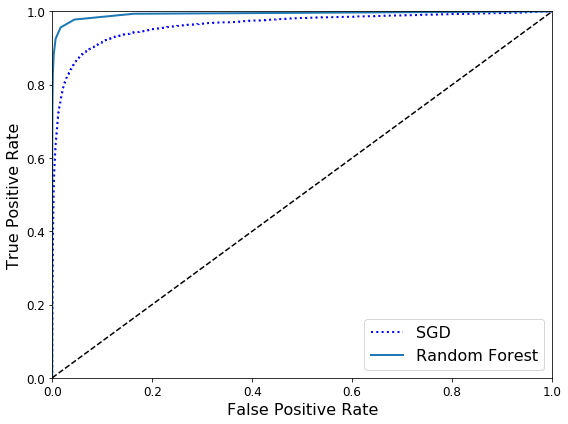

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [44]:
y_train_pred_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5, y_train_pred_forest))
print(recall_score(y_train_5, y_train_pred_forest))

0.9852973447443494
0.8282604685482383
